<p> full explaination of code about <a href="https://techfor-today.com/semi-supervised-learning-in-machine-learning-using-python/semi-supervised"> semi-supervised learning is here </a></p>

In [40]:
# importing the make_classification function
from sklearn.datasets import make_classification

# creading random dataset with two input variables
Input, output = make_classification(n_samples=2000, n_features=2, n_informative=2, n_redundant=0, random_state=1)

In [8]:
# importing the train_test_split function
from sklearn.model_selection import train_test_split

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(Input, output, test_size=0.50, random_state=1, stratify=output)

In [9]:

# split train into labeled and unlabeled
X_train_lab, X_test_unlab, y_train_lab, y_test_unlab = train_test_split(X_train, y_train, test_size=0.50, random_state=1, stratify=y_train)

In [11]:
# importing module
from numpy import concatenate

# create the training dataset input
X_train_mixed = concatenate((X_train_lab, X_test_unlab))

In [12]:
# create "no label" for unlabeled data
nolabel = [-1 for _ in range(len(y_test_unlab))]

In [13]:
# recombine training dataset labels
y_train_mixed = concatenate((y_train_lab, nolabel))

In [14]:
# importing the module
from sklearn.semi_supervised import LabelPropagation

# define model
model = LabelPropagation()

# fit model on training dataset
model.fit(X_train_mixed, y_train_mixed)

LabelPropagation()

In [15]:
# make predictions on hold out test set
y_pred = model.predict(X_test)

<AxesSubplot:>

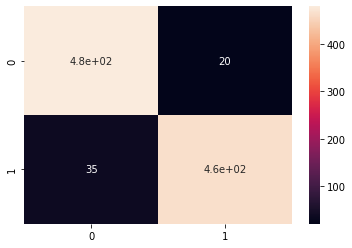

In [17]:
# importing seaborn
import seaborn as sns

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix

# providing actual and predicted values
cm = confusion_matrix(y_test, y_pred)

# If True, write the data value in each cell
sns.heatmap(cm,annot=True)


In [18]:
#importing the classification report
from sklearn.metrics import classification_report

# printing the classification report
print(classification_report(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       500
           1       0.96      0.93      0.94       500

    accuracy                           0.94      1000
   macro avg       0.95      0.95      0.94      1000
weighted avg       0.95      0.94      0.94      1000



In [1]:
# importing pandas
import pandas as pd

# Read in data
data = pd.read_csv('marketing_campaign.csv', 
                 encoding='utf-8', delimiter=';',
                 usecols=['ID', 'Year_Birth', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'MntWines', 'MntMeatProducts']
                )

# Create a flag to denote whether the person has any dependants at home (either kids or teens)
data['Dependents_Flag']=data.apply(lambda x: 1 if x['Kidhome']+x['Teenhome']>0 else 0, axis=1)

# Print dataframe
data.head()

,ID,Year_Birth,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntMeatProducts,Dependents_Flag
0,5524,1957,Single,58138.0,0,0,635,546,0
1,2174,1954,Single,46344.0,1,1,11,6,1
2,4141,1965,Together,71613.0,0,0,426,127,0
3,6182,1984,Together,26646.0,1,0,11,20,1
4,5324,1981,Married,58293.0,1,0,173,118,1


In [3]:

from sklearn.model_selection import train_test_split

# splitting dataset into testing and training parts
df_train, df_test = train_test_split(data, test_size=0.25)


In [4]:
# Create a flag for label masking
df_train['Random_Mask'] = True
df_train.loc[df_train.sample(frac=0.05, random_state=0).index, 'Random_Mask'] = False

# Create a new target colum with labels. 
df_train['Dependents_Target']=df_train.apply(lambda x: x['Dependents_Flag'] if x['Random_Mask']==False else -1, axis=1)

# Show target value distribution
print('Target Value Distribution:')
print(df_train['Dependents_Target'].value_counts())

Target Value Distribution:
-1    1596
 1      58
 0      26
Name: Dependents_Target, dtype: int64


In [5]:
# importing sklearn
from sklearn.svm import SVC

# Select data for modeling
X_train=df_train[['MntMeatProducts', 'MntWines']]
y_train=df_train['Dependents_Target'].values


# Specify SVC model parameters
model_svc = SVC(probability=True)

In [6]:
# importing selftraining classifier
from sklearn.semi_supervised import SelfTrainingClassifier

# Specify Self-Training model parameters
self_training_model = SelfTrainingClassifier(base_estimator=model_svc)

# Fit the model
clf_ST = self_training_model.fit(X_train, y_train)

In [8]:
# Put test data into an array
X_test=df_test[['MntMeatProducts', 'MntWines']]
y_test=df_test['Dependents_Flag'].values

In [11]:
# calculating the accuracy score
accuracy_score_ST = clf_ST.score(X_test, y_test)
print('Accuracy Score: ', accuracy_score_ST)

Accuracy Score:  0.8053571428571429
